In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append('..')
sys.path.append('../..')
sys.path.append('.')
sys.path.append('./scripts')

In [2]:
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 2.0

### Classification

In [ ]:
task = "classification" 
combined_df = pd.DataFrame()
datasets = ['openml_361063', 'openml_361069', 'openml_361062', 'openml_9978', 'openml_361071', 'openml_43']
split_seeds = [1,2,3,4]
sample_seeds = [1,2,3,4,5]
for data in datasets:
    ablation_directory =f"./results_new/mdi_local.real_data_{task}_{data}/{data}_selection/varying_sample_row_n"
    for split_seed in split_seeds:
        for sample_seed in sample_seeds:
            df = pd.read_csv(os.path.join(ablation_directory, f"seed_{split_seed}_{sample_seed}/results.csv"))
            df["data"] = data
            combined_df = pd.concat([combined_df, df], ignore_index=True)

In [ ]:
methods = [
    'lmdi+',    
    'lmdi',
    'LIME',
    'Treeshap',
]
color_map = {
    'LIME': '#71BEB7',
    'Treeshap': 'orange',
    'lmdi': '#9B5DFF',
    'lmdi+': 'black'
}


data_name = {
    "openml_43": "Spam",
    "openml_361062": "Pol",
    "openml_361071": "Jannis",
    "openml_9978": "Ozone",
    "openml_361069": "Higgs",
    "openml_361063": "House 16H"
}

feature_values = {
    "openml_43": 57,
    "openml_361062": 26,
    "openml_361071": 54,
    "openml_9978": 47,
    "openml_361069": 24,
    "openml_361063": 16
}

methods_name = {
    'LIME': 'LIME',
    'lmdi': 'LMDI',
    'Treeshap': 'TreeSHAP',
    'lmdi+': 'LMDI+',
}

In [ ]:
df = combined_df
datasets = df["data"].unique()

marker_size = 7

n_cols = 3
n_rows = 2

fig, axs = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(8 * n_cols, 5.5 * n_rows),
    sharey=False
)

axs = axs.flatten()

for idx, dataset in enumerate(datasets):
    ax = axs[idx]
    subset = df[df["data"] == dataset]

    for method in methods:
        method_data = subset[subset["fi"] == method]

        auroc_cols = [
            "RF_Classifier_AUROC_keep_0.1", "RF_Classifier_AUROC_keep_0.2", "RF_Classifier_AUROC_keep_0.3",
            "RF_Classifier_AUROC_keep_0.4", "RF_Classifier_AUROC_keep_0.5", "RF_Classifier_AUROC_keep_0.6",
            "RF_Classifier_AUROC_keep_0.7", "RF_Classifier_AUROC_keep_0.8", "RF_Classifier_AUROC_keep_0.9",
            "RF_Classifier_AUROC_keep_1.0"
        ]
        means = method_data[auroc_cols].mean(axis=0).values
        stds = method_data[auroc_cols].std(axis=0).values
        counts = method_data[auroc_cols].count(axis=0).values
        sems = stds / np.sqrt(counts)

        x = [0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1.0]

        if method in ['LIME', 'Treeshap', 'lmdi']:
            ax.errorbar(
                x, means, sems,
                label=methods_name[method], linestyle='solid',
                marker='o', markersize=marker_size, color=color_map[method], linewidth=3, alpha=0.5
            )
        else:
            ax.errorbar(
                x, means, sems,
                label=methods_name[method], linestyle='solid',
                marker='o', markersize=marker_size, color=color_map[method], linewidth=3
            )

    ax.set_xticks([0.1, 0.3, 0.5, 0.7, 0.9])
    ax.set_xticklabels(["10%", "30%", "50%", "70%", "90%"], fontsize=22)
    ax.tick_params(axis='y', labelsize=22)
    if idx >= (n_rows - 1) * n_cols:
        ax.set_xlabel("Percentage of Top Features Retained", fontsize=25)

    if idx % n_cols == 0:
        ax.set_ylabel("AUROC", fontsize=24)
    else:
        ax.set_ylabel("")
    
    dataset_label = data_name[dataset].replace(' ', r'\ ')
    p_val = feature_values[dataset]
    ax.set_title(f"$\\mathbf{{{dataset_label} \ (p={p_val}) }}$", fontsize=25)
    
    if (idx + 1) % n_cols == 0 or idx == len(datasets) - 1:
        ax.legend(fontsize=18, loc='lower right')

plt.tight_layout()
plt.savefig("feature_selection_classification_full.pdf", format='pdf', bbox_inches='tight')
plt.show()

### Regression

In [ ]:
task = "regression" 
combined_df = pd.DataFrame()
datasets = ['openml_361260', 'openml_361254', 'openml_361259', 'openml_361253', 'openml_361243', 'openml_361242']
split_seeds = [1,2,3,4]
sample_seeds = [1,2,3,4,5]
for data in datasets:
    ablation_directory =f"./results_new/mdi_local.real_data_{task}_{data}/{data}_selection/varying_sample_row_n"
    for split_seed in split_seeds:
        for sample_seed in sample_seeds:
            try:
                df = pd.read_csv(os.path.join(ablation_directory, f"seed_{split_seed}_{sample_seed}/results.csv"))
                df["data"] = data
                combined_df = pd.concat([combined_df, df], ignore_index=True)
            except:
                pass

In [14]:
methods = [
    'lmdi+',    
    'lmdi',
    'LIME',
    'Treeshap',
]
color_map = {
    'LIME': '#71BEB7',
    'Treeshap': 'orange',
    'lmdi': '#9B5DFF',
    'lmdi+': 'black'
}

data_name = {
    "openml_361260": "Miami Housing",
    "openml_361259": "Puma Robot",
    "openml_361253": "Wave Energy",
    "openml_361254": "SARCOS",
    "openml_361242": "Super Conductivity",
    "openml_361243": "Geographic Origin of Music"
}

feature_values = {
    "openml_361260": 15,
    "openml_361259": 32,
    "openml_361253": 48,
    "openml_361254": 21,
    "openml_361242": 81,
    "openml_361243": 72
}

methods_name = {
    'LIME': 'LIME',
    'lmdi': 'LMDI',
    'Treeshap': 'TreeSHAP',
    'lmdi+': 'LMDI+',
}

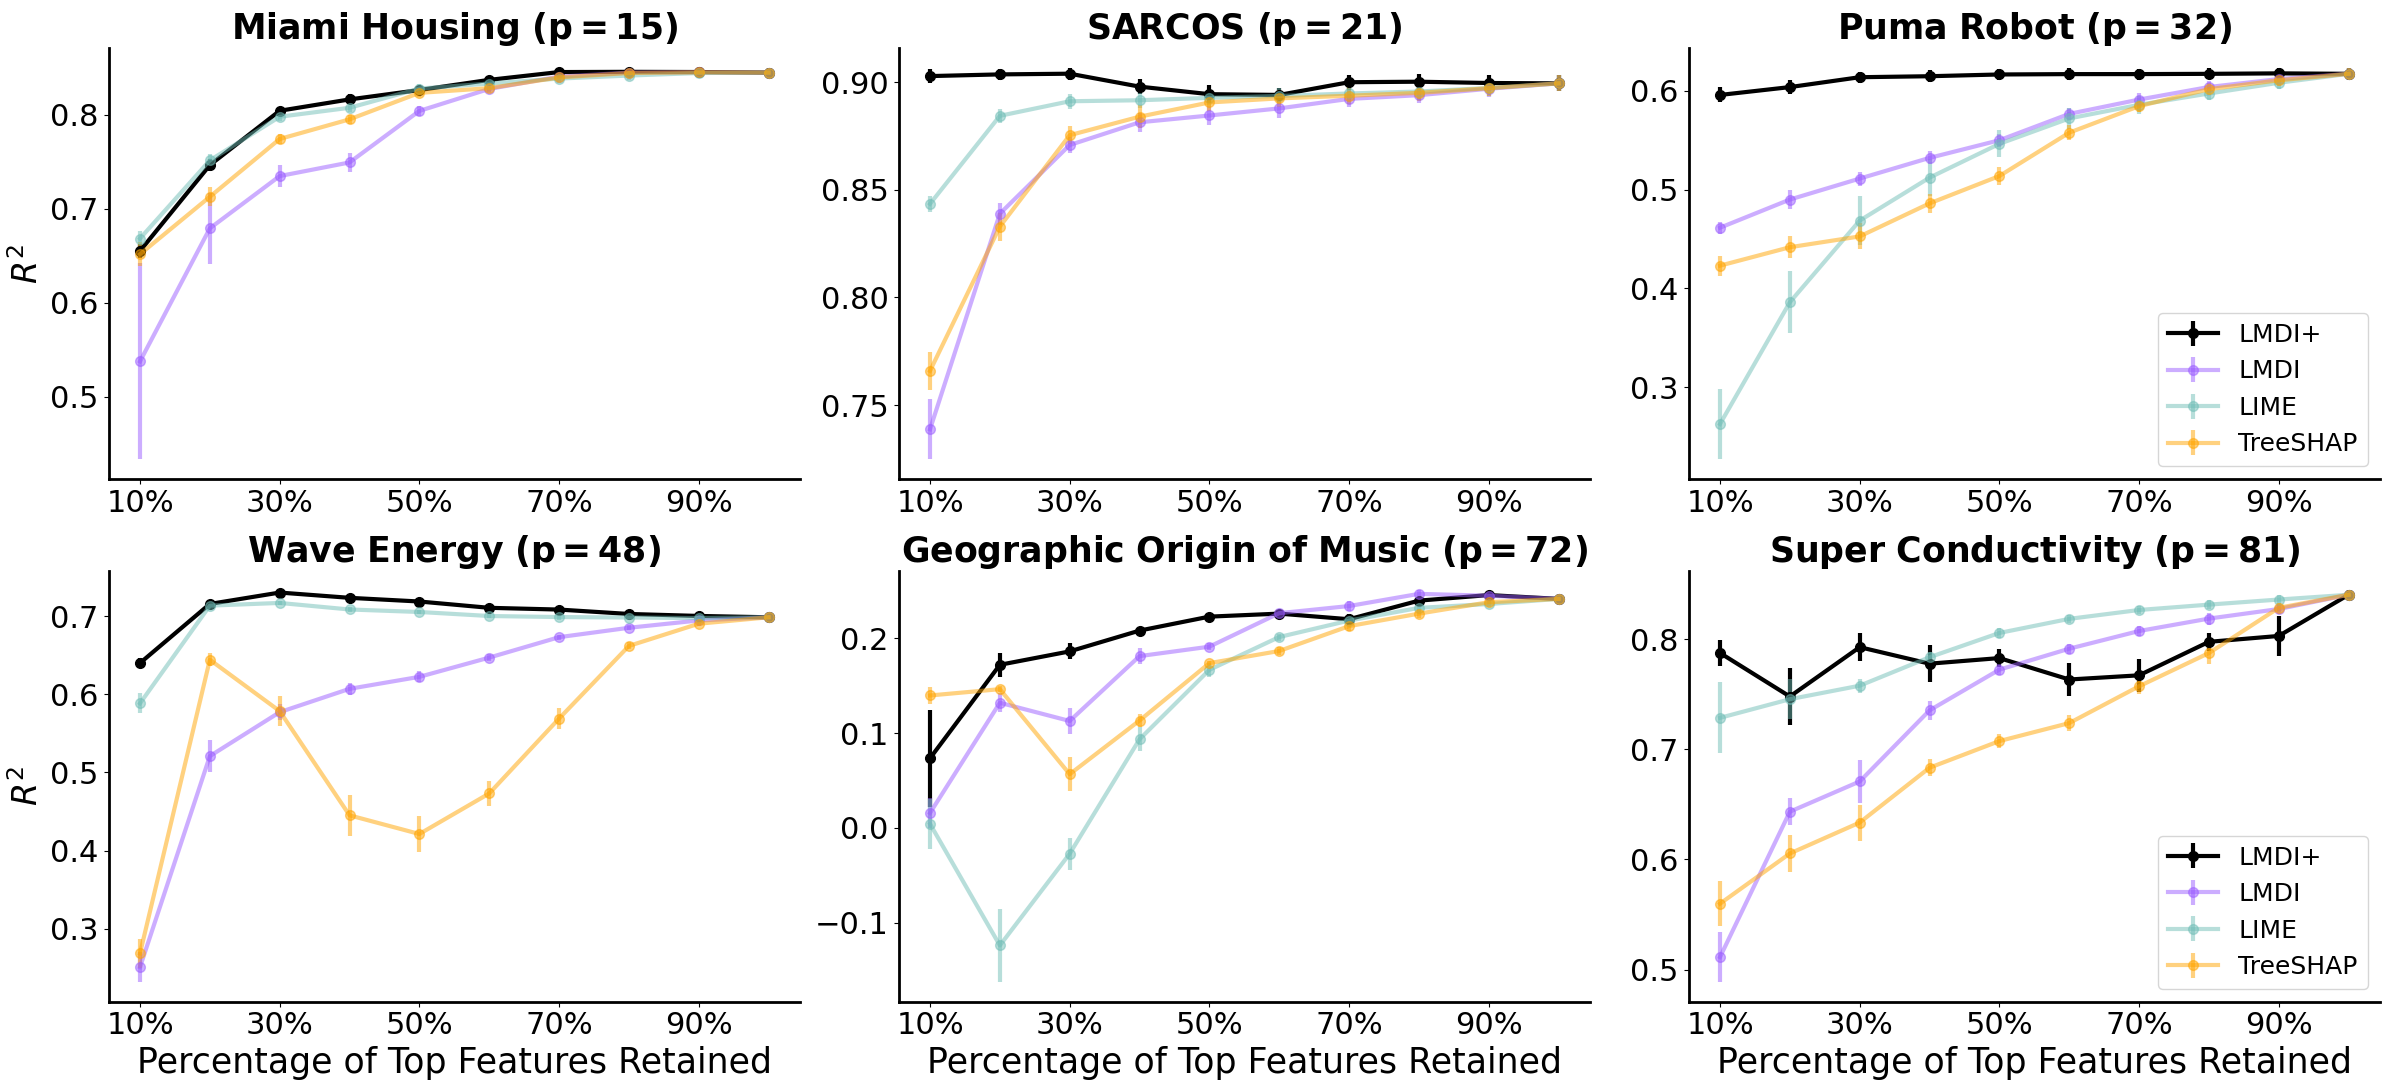

In [15]:
df = combined_df
datasets = df["data"].unique()

marker_size = 7

n_cols = 3
n_rows = 2

fig, axs = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(8 * n_cols, 5.5 * n_rows),
    sharey=False
)

axs = axs.flatten()

for idx, dataset in enumerate(datasets):
    ax = axs[idx]
    subset = df[df["data"] == dataset]
    
    for method in methods:
        method_data = subset[subset["fi"] == method]
        r2_col = ["RF_Regressor_R2_keep_0.1", "RF_Regressor_R2_keep_0.2", "RF_Regressor_R2_keep_0.3",
            "RF_Regressor_R2_keep_0.4", "RF_Regressor_R2_keep_0.5", "RF_Regressor_R2_keep_0.6", "RF_Regressor_R2_keep_0.7",
            "RF_Regressor_R2_keep_0.8", "RF_Regressor_R2_keep_0.9", "RF_Regressor_R2_keep_1.0"]
        means = method_data[r2_col].mean(axis=0).values
        stds = method_data[r2_col].std(axis=0).values
        counts = method_data[r2_col].count(axis=0).values
        sems = stds / np.sqrt(counts)
        x = [0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1.0]

        if method in ['LIME', 'Treeshap', 'lmdi']:
            ax.errorbar(
                x, means, sems,
                label=methods_name[method], linestyle='solid',
                marker='o', markersize=marker_size, color=color_map[method], linewidth=3, alpha=0.5
            )
        else:
            ax.errorbar(
                x, means, sems,
                label=methods_name[method], linestyle='solid',
                marker='o', markersize=marker_size, color=color_map[method], linewidth=3
            )

    ax.set_xticks([0.1, 0.3, 0.5, 0.7, 0.9])
    ax.set_xticklabels(["10%", "30%", "50%", "70%", "90%"], fontsize=22)
    ax.tick_params(axis='y', labelsize=22)
    if idx >= (n_rows - 1) * n_cols:
        ax.set_xlabel("Percentage of Top Features Retained", fontsize=25)
    
    if idx % n_cols == 0:
        ax.set_ylabel(r"$R^2$", fontsize=24)
    else:
        ax.set_ylabel("")
    
    dataset_label = data_name[dataset].replace(' ', r'\ ')
    p_val = feature_values[dataset]
    ax.set_title(f"$\\mathbf{{{dataset_label} \ (p={p_val}) }}$", fontsize=25)
    
    if (idx + 1) % n_cols == 0 or idx == len(datasets) - 1:
        ax.legend(fontsize=18, loc='lower right')

plt.tight_layout()
plt.savefig("feature_selection_regression_full.pdf", format='pdf', bbox_inches='tight')
plt.show()